In [1]:
## AHRI Standard 340/360-2022-(I-P) - Table 6. Conditions for Standard Rating and Operating Tests
    # Cooling-Standard Rating Conditions Cooling 
    #    - Indoor Section - Air Entering: Dry bulb - 80F; Wet bulb - 67F
    #    - Outdoor Section - Condenser Type = Air Cooled/Evaporative: Dry bulb - 95F; Wet bulb - 75F

## ANSI/AHRI Standard 550/590-2023 (I-P) - Table 4. Standard Rating Conditions
    # All Cooling - Cooling Mode Evaporator - Air Entering: Dry bulb - 54F; Wet bulb - 44F (only this make sense to me)
    # 54F = 12.222C; 44F = 6.6667C

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### all functions to use

def c_to_f(celsius):
    return celsius * 9/5 + 32
    
def draw_hist(ax, df, col, filter_col, bins = 20, site = '', std = 0):

    # Plot a histogram with specified bins
    ax.hist(df[df[filter_col] != 0][col], bins=bins, edgecolor='black', alpha=0.7)
    if std != 0:
        ax.axvline(x=std, color='red', linestyle='--', label='Threshold')
    # Add labels and title
    ax.set_title(site+' '+col)
    ax.set_xlabel('temperatures')
    ax.set_ylabel('Frequency')

In [4]:
### all functions to use

def c_to_f(celsius):
    return celsius * 9/5 + 32
    
def draw_hist(ax, df, col, filter_col, bins = 20, site = '', std = 0, lb = 40, ub = 90):

    # Plot a histogram with specified bins
    ax.hist(df[df[filter_col] != 0][col], bins=bins, edgecolor='black', alpha=0.7, range=(lb, ub))
    if std != 0:
        ax.axvline(x=std, color='red', linestyle='--', label='Threshold')
    # Add labels and title
    ax.set_title(site+' '+col)
    ax.set_xlabel('temperatures')
    ax.set_ylabel('Frequency')

# Hospital

In [9]:
df_nyc = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_NewYork.csv')
df_sea = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_Seattle.csv')
df_tpa = pd.read_csv('./chiller_data/ASHRAE901_Hospital_STD2022_Tampa.csv')

dfs = [df_nyc, df_sea, df_tpa]
for i,df in enumerate(dfs):
    dfs[i].columns = ['Datetime', 'hr_chiller_evap_temp_outlet', 'hr_chiller_mass_flow_rate','hr_chiller_evap_temp_inlet',
                 'Leaving Condenser Temperature (°F)', 'chiller1_mass_flow_rate','Entering Condenser Temperature (°F)',
                 'chiller2_evap_temp_outlet', 'chiller2_mass_flow_rate','chiller2_evap_temp_inlet']
    selected_columns = ['Leaving Condenser Temperature (°F)', 'Entering Condenser Temperature (°F)']
    dfs[i][selected_columns] = dfs[i][selected_columns].apply(lambda row: row.apply(c_to_f), axis=1)
    dfs[i] = dfs[i].round(2)


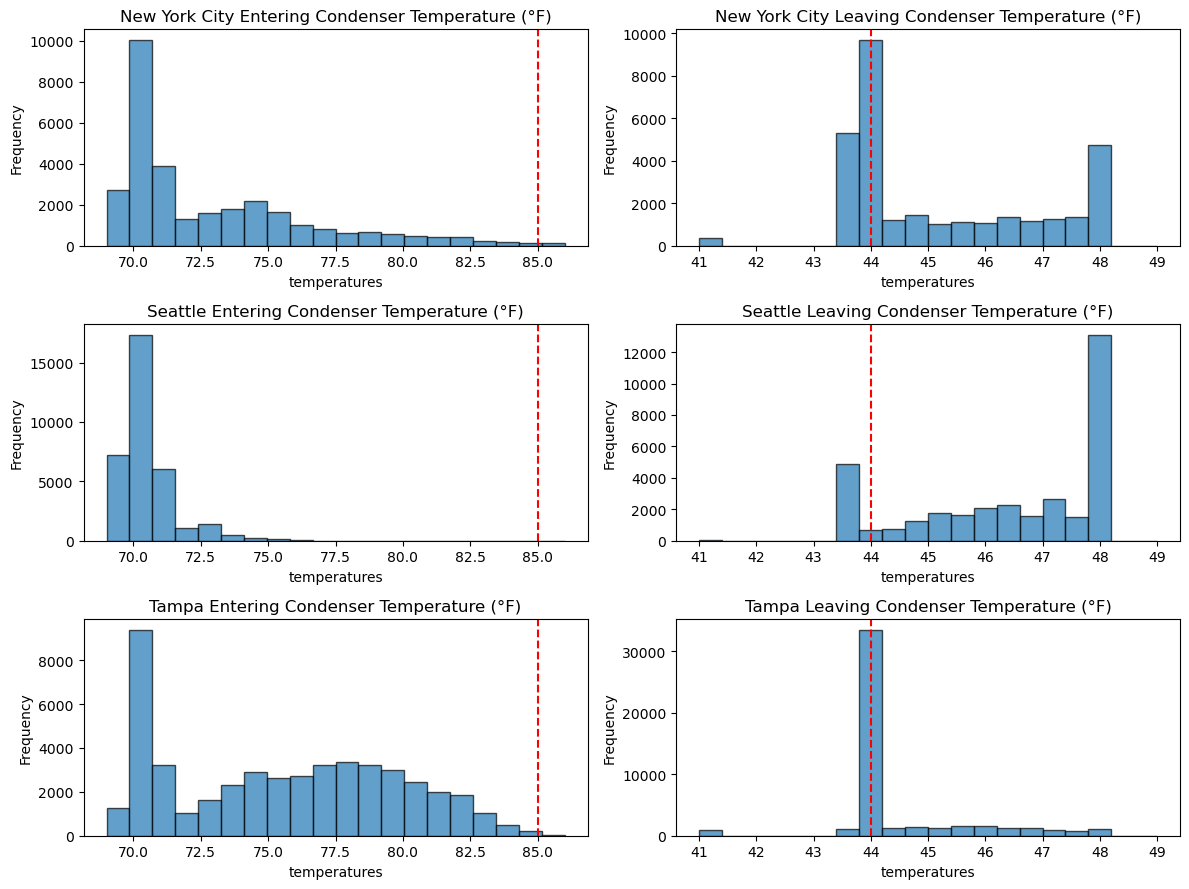

In [10]:
num_cols = 2
num_plots = num_cols * len(dfs)
num_rows = len(dfs)
sites = ['New York City','Seattle','Tampa']
std_temp = [85,44]
lbs = [69, 41]
ubs = [86, 49]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20

for i, df in enumerate(dfs):        
    cols = ['Entering Condenser Temperature (°F)', 'Leaving Condenser Temperature (°F)']
    filter_col = 'chiller1_mass_flow_rate'
    for k, col in enumerate(cols):
        ax = axes[i, k]  # Adjust indexing to access the correct subplot
        draw_hist(ax, df, col, filter_col, bins = bins, site=sites[i], std = std_temp[k], lb = lbs[k], ub=ubs[k])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

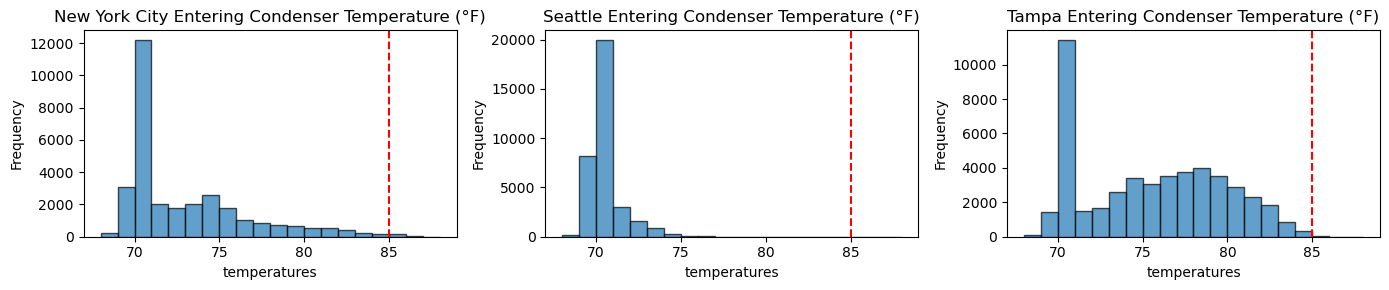

In [11]:
num_cols = 1
num_plots = num_cols * len(dfs)
num_rows = len(dfs)
sites = ['New York City','Seattle','Tampa']
std_temp = 85
lb = 68
ub = 88

fig, axes = plt.subplots(num_cols, num_rows, figsize=(14, 3))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20

for i, df in enumerate(dfs):        
    col = 'Entering Condenser Temperature (°F)'
    filter_col = 'chiller1_mass_flow_rate'
    ax = axes[i]  # Adjust indexing to access the correct subplot
    draw_hist(ax, df, col, filter_col, bins = bins, site=sites[i], std = std_temp, lb = lb, ub=ub)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# OfficeLarge

In [24]:
df_nyc = pd.read_csv('./chiller_data/ASHRAE901_OfficeLarge_STD2022_NewYork.csv')
df_sea = pd.read_csv('./chiller_data/ASHRAE901_OfficeLarge_STD2022_Seattle.csv')
df_tpa = pd.read_csv('./chiller_data/ASHRAE901_OfficeLarge_STD2022_Tampa.csv')

dfs = [df_nyc, df_sea, df_tpa]
for i,df in enumerate(dfs):
    dfs[i].columns = ['Datetime', 'Leaving Condenser Temperature (°F)', 'chiller1_mass_flow_rate','Entering Condenser Temperature (°F)',
                 'chiller2_evap_temp_outlet', 'chiller2_mass_flow_rate','chiller2_evap_temp_inlet']
    selected_columns = ['Leaving Condenser Temperature (°F)', 'Entering Condenser Temperature (°F)']
    dfs[i][selected_columns] = dfs[i][selected_columns].apply(lambda row: row.apply(c_to_f), axis=1)
    dfs[i] = dfs[i].round(2)

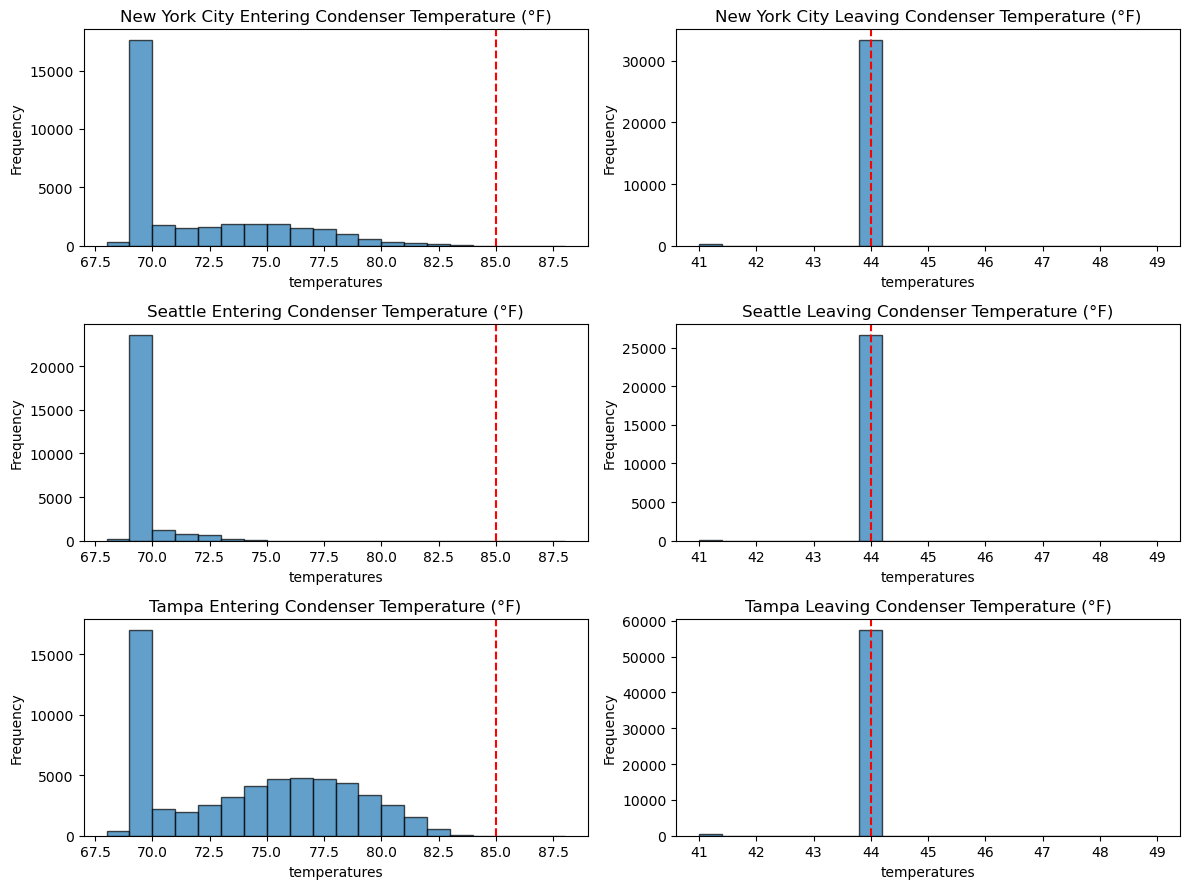

In [28]:
num_cols = 2
num_plots = num_cols * len(dfs)
num_rows = len(dfs)
sites = ['New York City','Seattle','Tampa']
std_temp = [85,44]
lbs = [68, 41]
ubs = [88, 49]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20

for i, df in enumerate(dfs):        
    cols = ['Entering Condenser Temperature (°F)', 'Leaving Condenser Temperature (°F)']
    filter_col = 'chiller1_mass_flow_rate'
    for k, col in enumerate(cols):
        ax = axes[i, k]  # Adjust indexing to access the correct subplot
        draw_hist(ax, df, col, filter_col, bins = bins, site=sites[i], std = std_temp[k], lb = lbs[k], ub=ubs[k])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

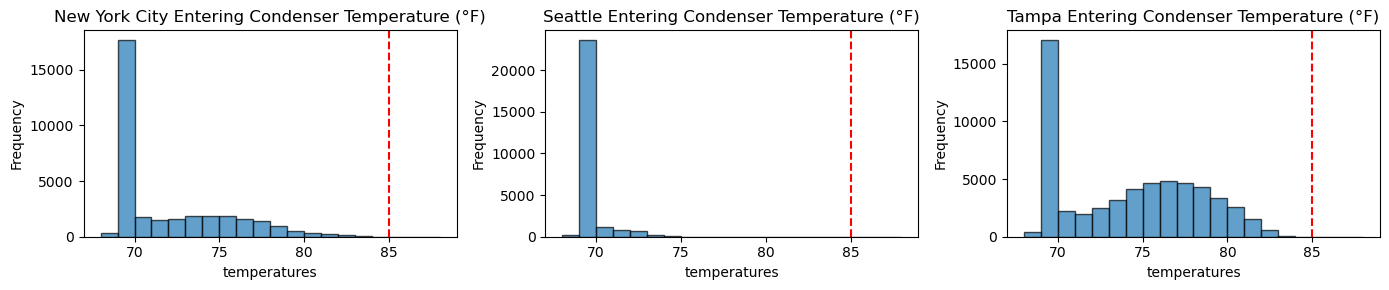

In [35]:
num_cols = 1
num_plots = num_cols * len(dfs)
num_rows = len(dfs)
sites = ['New York City','Seattle','Tampa']
std_temp = 85
lb = 68
ub = 88

fig, axes = plt.subplots(num_cols, num_rows, figsize=(14, 3))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20

for i, df in enumerate(dfs):        
    col = 'Entering Condenser Temperature (°F)'
    filter_col = 'chiller1_mass_flow_rate'
    ax = axes[i]  # Adjust indexing to access the correct subplot
    draw_hist(ax, df, col, filter_col, bins = bins, site=sites[i], std = std_temp, lb = lb, ub=ub)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# OfficeSmall

In [54]:
df_nyc = pd.read_csv('./chiller_data/ASHRAE901_OfficeSmall_STD2022_NewYork.csv')
df_sea = pd.read_csv('./chiller_data/ASHRAE901_OfficeSmall_STD2022_Seattle.csv')
df_tpa = pd.read_csv('./chiller_data/ASHRAE901_OfficeSmall_STD2022_Tampa.csv')

dfs = [df_nyc, df_sea, df_tpa]
for i,df in enumerate(dfs):
    dfs[i].columns = ['Datetime', 'outdoor_air_drybulb_temp','outdoor_air_wetbulb_temp','supply_fan_outlet_drybulb_temp', 'supply_fan_mass_flow_rate','supply_fan_outlet_wetbulb_temp',
                 'cooling_coil_outlet_drybulb_temp', 'cooling_coil_outlet_wetbulb_temp']
    selected_columns = ['supply_fan_outlet_drybulb_temp', 'cooling_coil_outlet_drybulb_temp']
    dfs[i][selected_columns] = dfs[i][selected_columns].apply(lambda row: row.apply(c_to_f), axis=1)
    dfs[i] = dfs[i].round(2)

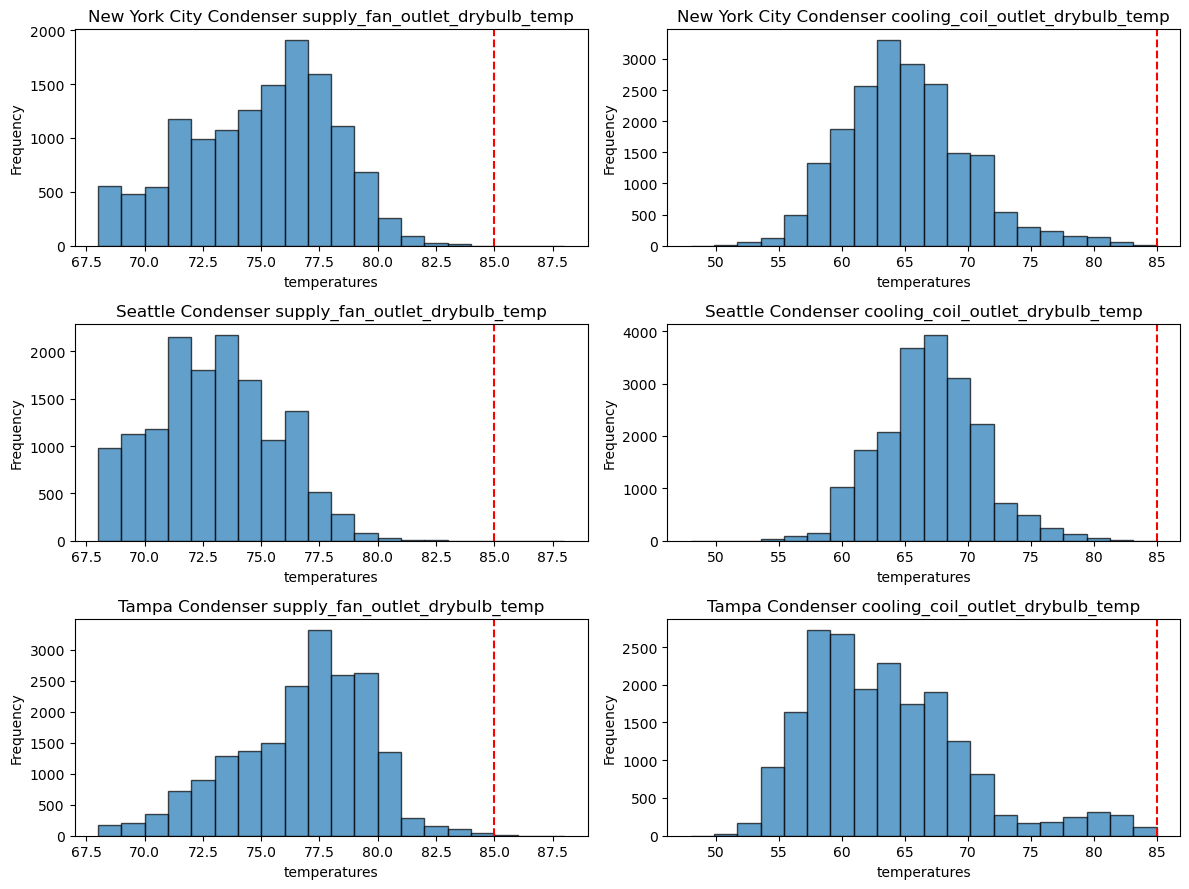

In [56]:
num_cols = 2
num_plots = num_cols * len(dfs)
num_rows = len(dfs)
sites = ['New York City','Seattle','Tampa']
std_temp = [85,85]
lbs = [68, 48]
ubs = [88, 85]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
bins = 20

for i, df in enumerate(dfs):        
    cols = ['supply_fan_outlet_drybulb_temp', 'cooling_coil_outlet_drybulb_temp']
    filter_col = 'supply_fan_mass_flow_rate'
    for k, col in enumerate(cols):
        ax = axes[i, k]  # Adjust indexing to access the correct subplot
        draw_hist(ax, df, cols[k], filter_col, bins = bins, site=sites[i], std = std_temp[k], lb = lbs[k], ub=ubs[k])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()